In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

## 1. 데이터 로드

In [149]:
df = pd.read_csv("HR_Attention.csv")
raw_df = pd.read_csv("HR_Attention.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Dataset Columns Description

- Age : 해당 직원의 나이
- Attrition : 퇴직 여부 Target값 (종속변수)
- BusinessTravel : 출장의 빈도
- DailyRate : 일 대비 급여의 수준
- Department : 업무분야
- DistanceFromHome : 집과의 거리
- Education : 교육의 정도
- EducationField : 전공
- EmployeeCount : 직원 숫자
- EmployeeNumber : 직원 ID
- EnvironmentSatisfaction : 업무 환경에 대한 만족도
- Gender : 성별
- HourlyRate : 시간 대비 급여의 수준
- JobInvolvement : 업무 참여도
- JobLevel : 업무의 수준
- JobRole : 업무 종류
- JobSatisfaction : 업무 만족도
- MaritalStatus : 결혼 여부
- MonthlyIncome : 월 소득
- MonthlyRate : 월 대비 급여 수준
- NumCompaniesWorked : 일한 회사의 수
- Over18 : 18세 이상
- OverTime : 규정외 노동시간
- PercentSalaryHike : 급여의 증가분 백분율
- PerformanceRating : 업무 성과
- RelationshipSatisfaction : 대인관계 만족도
- StandardHours : 표준 시간
- StockOptionLevel : 스톡옵션 정도
- TotalWorkingYears : 경력 기간
- TrainingTimesLastYear : 교육 시간
- WorkLifeBalance : 일과 생활의 균형 정도
- YearsAtCompany : 근속 연수
- YearsInCurrentRole : 현재 역할의 년수
- YearsSinceLastPromotion : 마지막 승진
- YearsWithCurrManager : 현재 관리자와 함께 보낸 시간

### 1.1 수치형 변수를 범주형 변수로 변환

Kaggle 설명에 따라 다음과 같이 범주형 변수로 변환함

In [150]:
# 수치형 변수 -> 범주형 변수 (시각화 편의상)
edu_dic = {1:"Below College", 2 :'College',3:'Bachelor',4:'Master', 5:'Doctor'}
#EnvironmentSatisfaction , JobInvolvement , JobSatisfaction , RelationshipSatisfaction ,
level_dic = {1:'Low', 2:'Medium', 3:'High', 4:'Very High'}
# PerformanceRating
performance_dic = {1:'Low', 2:'Good', 3:'Excellent', 4:'Outstanding'}
# WorkLifeBalance
wlb_dic = {1:'Bad', 2:'Good', 3:'Better', 4:'Best'}

In [151]:
df = df.replace({"Education": edu_dic})
df = df.replace({"EnvironmentSatisfaction": level_dic})
df = df.replace({"JobInvolvement": level_dic})
df = df.replace({"JobSatisfaction": level_dic})
df = df.replace({"RelationshipSatisfaction": level_dic})
df = df.replace({"PerformanceRating": performance_dic})
df =  df.replace({"WorkLifeBalance": wlb_dic})

In [152]:
cat_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()
for col in cat_cols :
    print(f"{col} : {df[col].unique()}")

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
Education : ['College' 'Below College' 'Master' 'Bachelor' 'Doctor']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EnvironmentSatisfaction : ['Medium' 'High' 'Very High' 'Low']
Gender : ['Female' 'Male']
JobInvolvement : ['High' 'Medium' 'Very High' 'Low']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
JobSatisfaction : ['Very High' 'Medium' 'High' 'Low']
MaritalStatus : ['Single' 'Married' 'Divorced']
Over18 : ['Y']
OverTime : ['Yes' 'No']
PerformanceRating : ['Excellent' 'Outstanding']
RelationshipSatisfaction : ['Low' 'Very High' 'Medium' 'High']
WorkLifeBalance : ['Bad' 'Better' 'Good' 'Best']


## 2. 데이터 정제

### 2.1 결측치

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

In [154]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

➡️ 결측치가 존재하지 않음

### 2.2 불필요한 Column 제거

In [9]:
#요약 통계량
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0


In [10]:
# nunique
for col in df.columns :
    print(f"{col} : {df[col].nunique()}")

Age : 43
Attrition : 2
BusinessTravel : 3
DailyRate : 886
Department : 3
DistanceFromHome : 29
Education : 5
EducationField : 6
EmployeeCount : 1
EmployeeNumber : 1470
EnvironmentSatisfaction : 4
Gender : 2
HourlyRate : 71
JobInvolvement : 4
JobLevel : 5
JobRole : 9
JobSatisfaction : 4
MaritalStatus : 3
MonthlyIncome : 1349
MonthlyRate : 1427
NumCompaniesWorked : 10
Over18 : 1
OverTime : 2
PercentSalaryHike : 15
PerformanceRating : 2
RelationshipSatisfaction : 4
StandardHours : 1
StockOptionLevel : 4
TotalWorkingYears : 40
TrainingTimesLastYear : 7
WorkLifeBalance : 4
YearsAtCompany : 37
YearsInCurrentRole : 19
YearsSinceLastPromotion : 16
YearsWithCurrManager : 18


**✅ 컬럼 제거 대상**

- `EmployeeCount`, `Over18`, `StandardHours` : nunique 개수 = 1

- `EmployeeNumber` : nunique 개수 = 전체 데이터 개수

In [155]:
df.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'],axis=1,inplace=True)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### 2.3 데이터 중복 확인

In [15]:
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


## 3. 이상치

**✅ IQR 방식**

In [156]:
def categorical_frequency (col) :
    print(f"<{col}>")
    print(df[col].value_counts())
    
def numeric_iqr (col) :
    q1 = df[col].quantile(q=0.25)
    q3 = df[col].quantile(q=0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

    return outliers.sum()

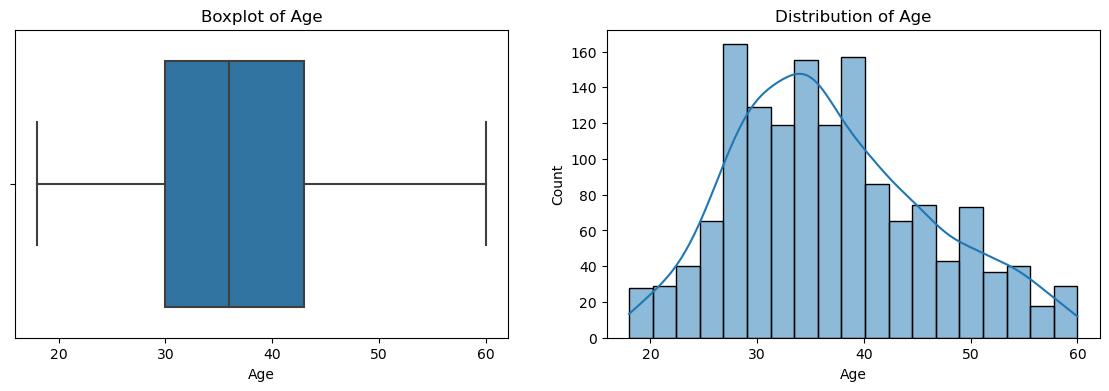

Num of outliers : 0
% of outliers : 0.0 %


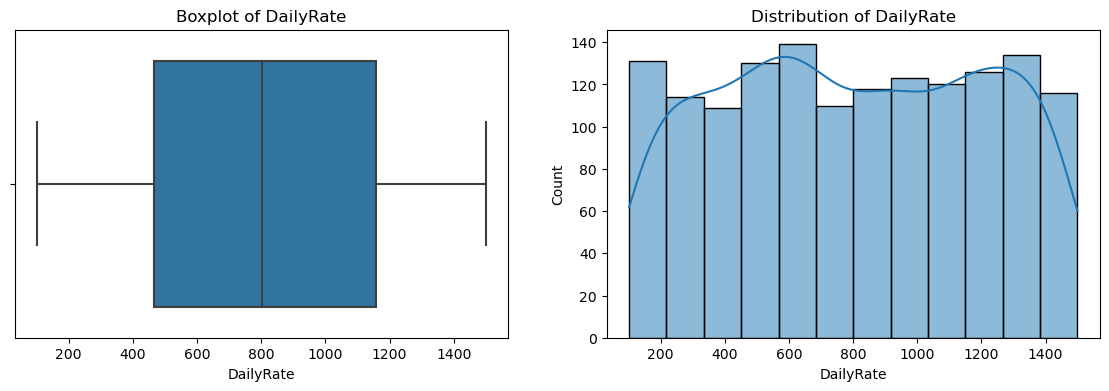

Num of outliers : 0
% of outliers : 0.0 %


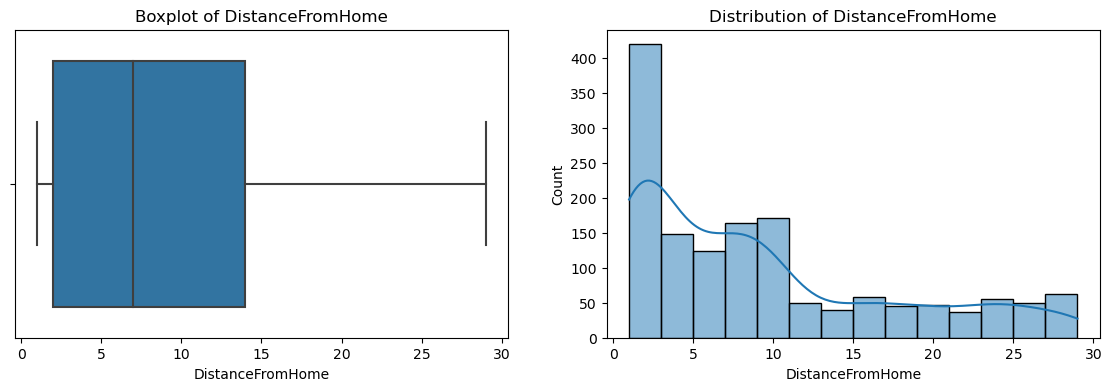

Num of outliers : 0
% of outliers : 0.0 %


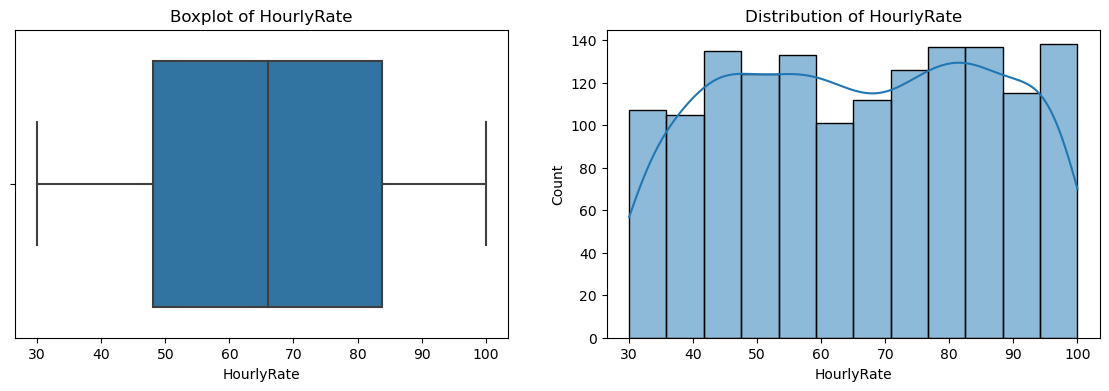

Num of outliers : 0
% of outliers : 0.0 %


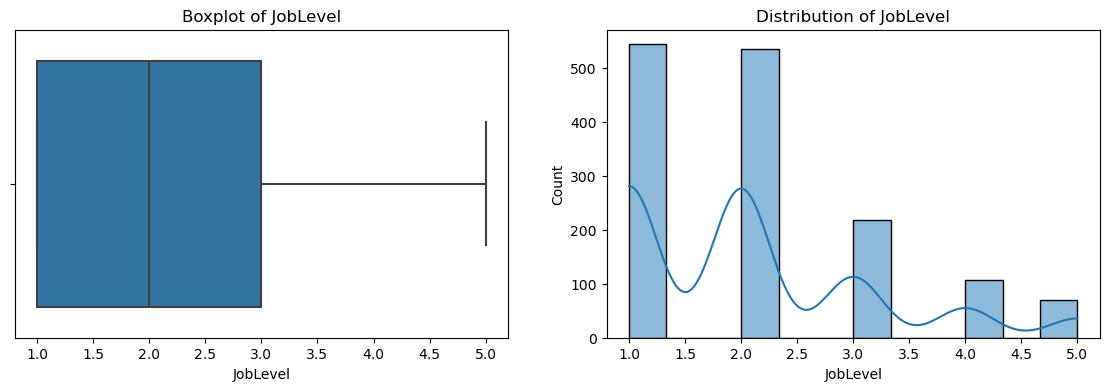

Num of outliers : 0
% of outliers : 0.0 %


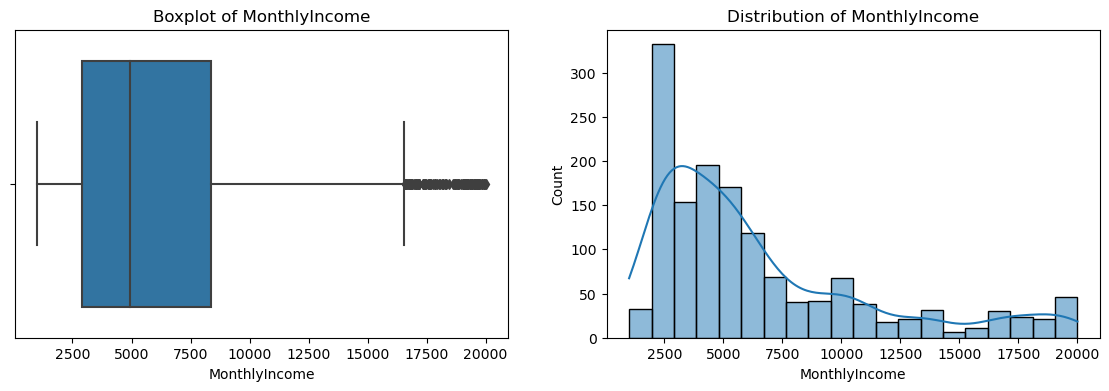

Num of outliers : 114
% of outliers : 7.755102040816326 %


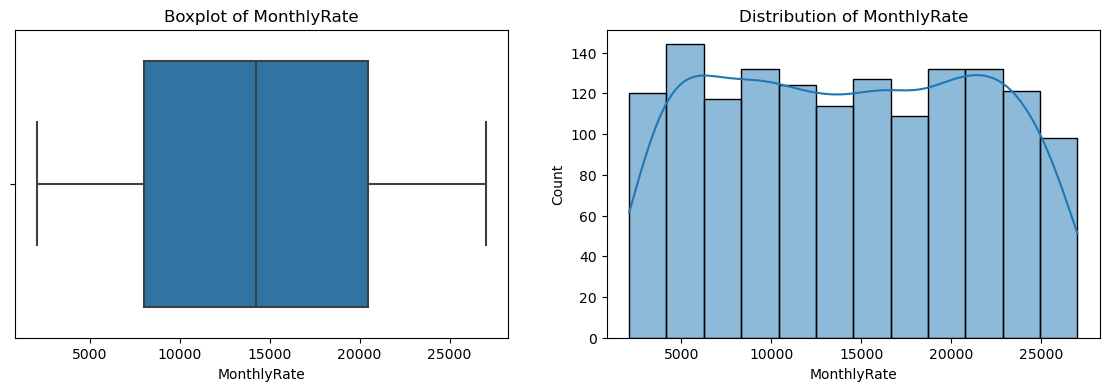

Num of outliers : 0
% of outliers : 0.0 %


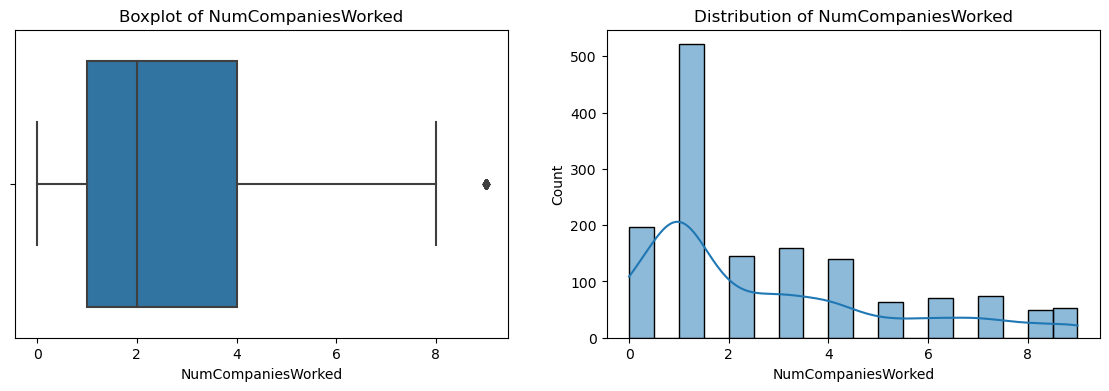

Num of outliers : 52
% of outliers : 3.537414965986395 %


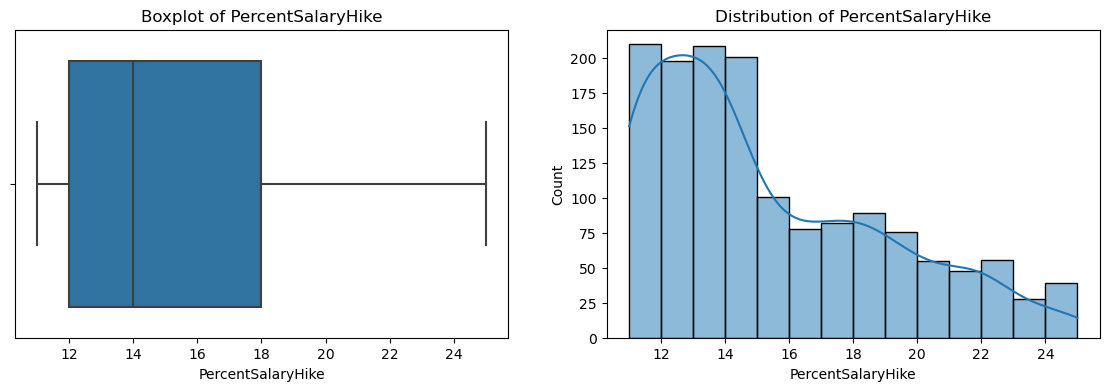

Num of outliers : 0
% of outliers : 0.0 %


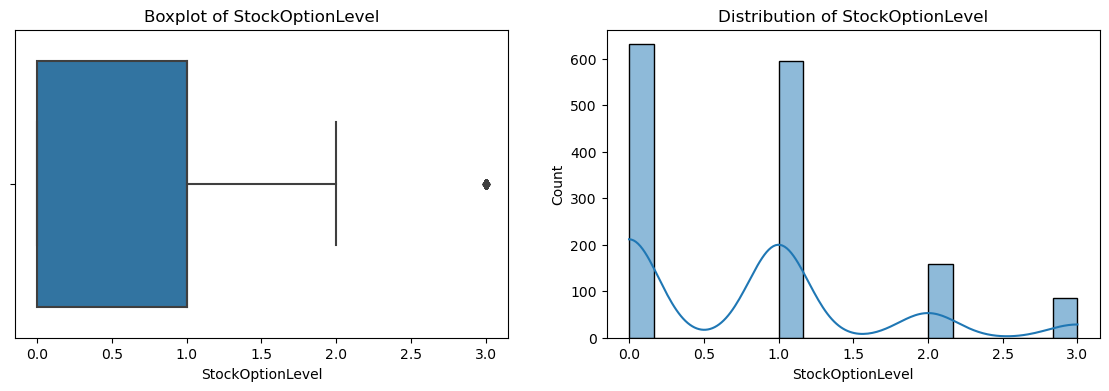

Num of outliers : 85
% of outliers : 5.782312925170068 %


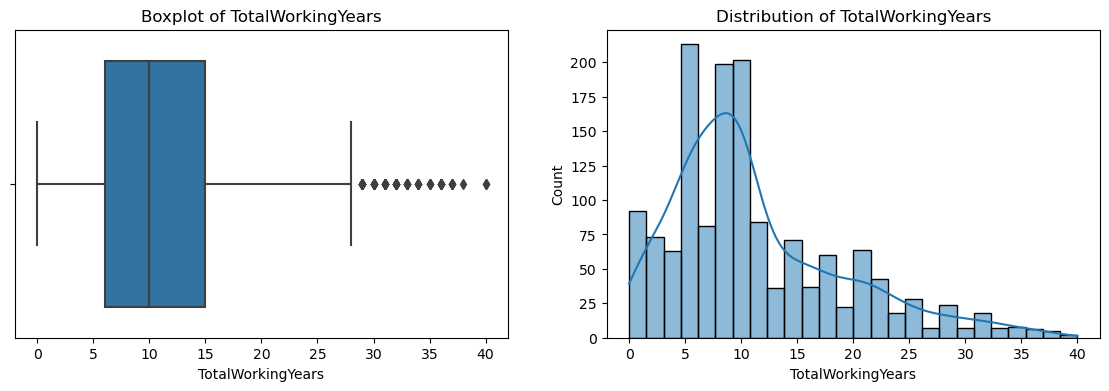

Num of outliers : 63
% of outliers : 4.285714285714286 %


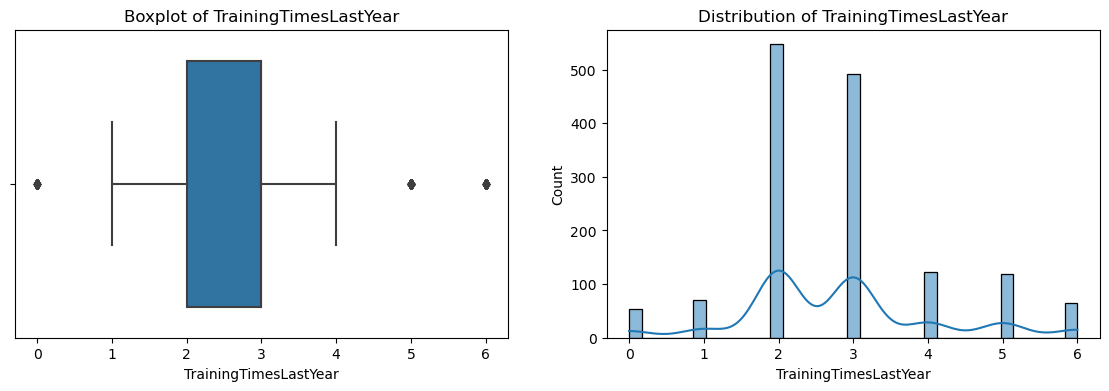

Num of outliers : 238
% of outliers : 16.19047619047619 %


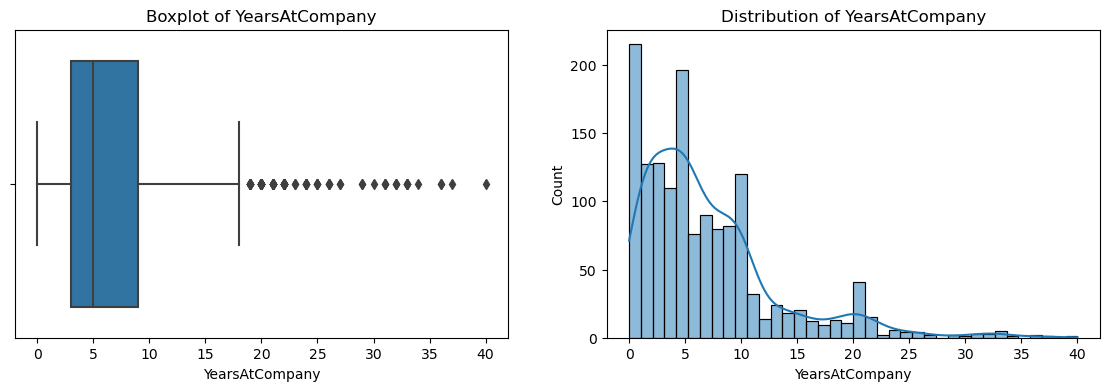

Num of outliers : 104
% of outliers : 7.07482993197279 %


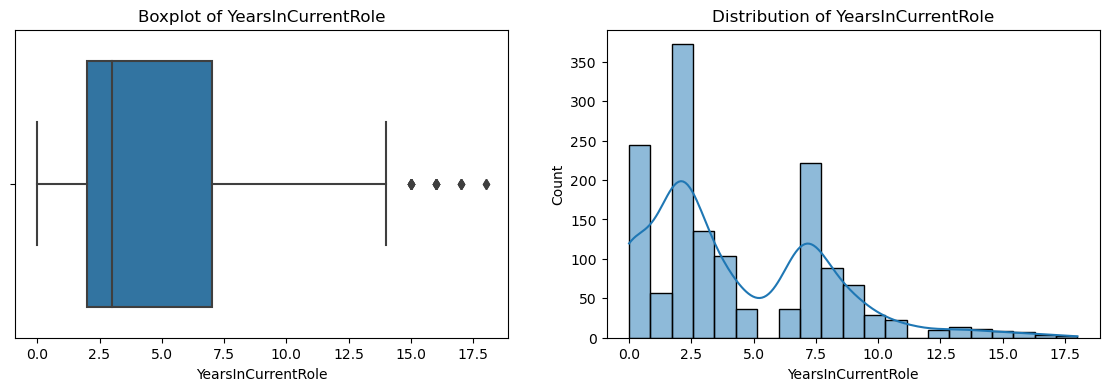

Num of outliers : 21
% of outliers : 1.4285714285714286 %


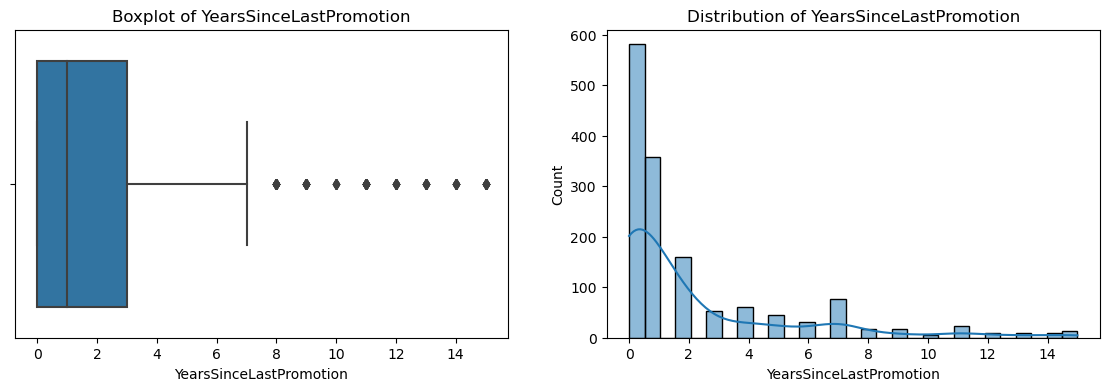

Num of outliers : 107
% of outliers : 7.278911564625851 %


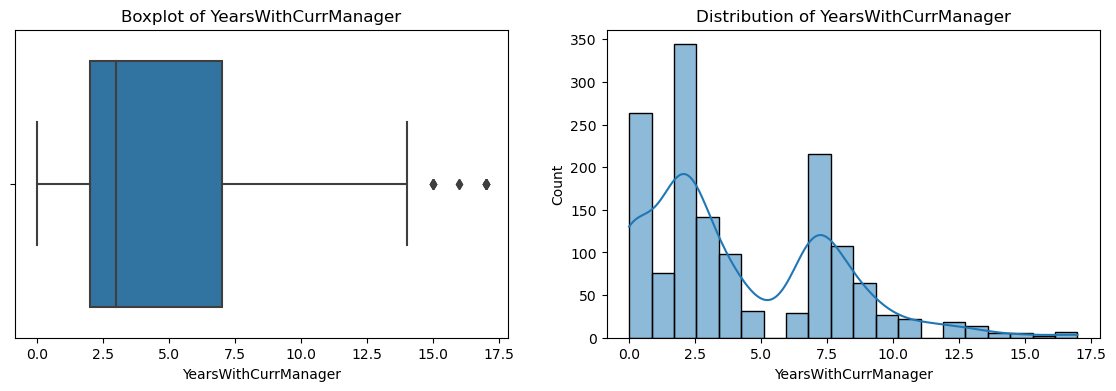

Num of outliers : 14
% of outliers : 0.9523809523809524 %


In [64]:
# outliers 시각화
numeric_col = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

for col in numeric_col:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # 1열: 상자 그림(Boxplot)
    sns.boxplot(x=df[col], ax=axes[0])
    axes[0].set_title(f'Boxplot of {col}')

    # 2열: 데이터 분포를 나타내는 히스토그램
    sns.histplot(df[col], kde=True, ax=axes[1])
    axes[1].set_title(f'Distribution of {col}')

    plt.show()
    print('Num of outliers :', numeric_iqr (col) )
    print('% of outliers :', numeric_iqr (col) / len(df) * 100, '%')

In [65]:
catgorical_col = df.select_dtypes(include=['category', 'object']).columns.tolist()

for col in catgorical_col :
    categorical_frequency (col)
    print()

<Attrition>
No     1233
Yes     237
Name: Attrition, dtype: int64

<BusinessTravel>
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

<Department>
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

<Education>
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64

<EducationField>
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<EnvironmentSatisfaction>
High         453
Very High    446
Medium       287
Low          284
Name: EnvironmentSatisfaction, dtype: int64

<Gender>
Male      882
Female    588
Name: Gender, dtype: int64

<JobInvolvement>
High         868
Medium       375
Very High    144
Low           83
Name: JobInvolvement, dtype: int6

➡️ `Attrition` 종속 변수의 분포도를 볼 때, imbalanced data 임을 알 수 있음

**✅ 확인해야 할 것**

- `NumCompaniesWorked` :
    
    1. IBM 직원이 일한 회사의 수가 0인 경우, IBM을 제외하고 고려한다면?
    2. `TotalWorkingYears`와 `YearsAtCompany`같을 때 `NumCompaniesWorked`가 어떤 값을 가지는지 확인하기
    3.`TotalWorkingYears` : 전적 회사가 없고 경력이 없으면 신입사원, 전적 회사가 없고 경력 기간이 있으면 경력이 IBM에서 일한 근속 연수와 같아야 한다

In [18]:
df[df['TotalWorkingYears'] - df['YearsAtCompany'] == 0]['NumCompaniesWorked'].value_counts()

1    474
Name: NumCompaniesWorked, dtype: int64

In [24]:
df[df['NumCompaniesWorked'] == 0][['TotalWorkingYears','YearsAtCompany']].value_counts()

TotalWorkingYears  YearsAtCompany
6                  5                 34
10                 9                 27
4                  3                 23
5                  4                 15
3                  2                 14
9                  8                 13
8                  7                 11
7                  6                  8
12                 11                 7
21                 20                 7
16                 15                 5
2                  1                  4
23                 22                 3
17                 16                 3
14                 13                 3
34                 33                 2
20                 19                 2
22                 21                 2
1                  0                  2
19                 18                 2
15                 14                 2
13                 12                 2
11                 10                 2
25                 24                 1
28    

- `NumCompaniesWorked` == 1 일 때, IBM에서의 근속연수와 총 경력기간은 동일하므로, IBM을 포함하는 것으로 고려
- `NumCompaniesWorked` == 0 일 때 모두 경력기간과 근속연수의 차이가 1씩 남

➡️ **이상치 + `NumCompaniesWorked` == 0인 데이터 제거하는 것이 좋을 듯 함**


## 4. 시각화

모든 변수에 대해 살펴본 후, 유의미하다고 판단되는 변수들만 최종적으로 시각화

In [190]:
def bar_plot(col) :
    plt.figure(figsize=(10, 6))
    attrition = df[df['Attrition'] == "Yes"]
    ratios = df.groupby(col)['Attrition'].value_counts(normalize=True).unstack()
    ratios = pd.DataFrame(ratios['Yes'])
    
    sns.barplot(x=col, y='Yes', data=ratios, palette='Set2', edgecolor='k')
    
    plt.title(f'Attrition Ratio by {col}', fontsize=16)
    plt.xlabel(f'{col}', fontsize=14)
    plt.ylabel('Attrition Ratio', fontsize=14)
    
    plt.show()

### 4.1 각 만족도에 따른 퇴사 비율

Text(0.5, 1.0, 'Attrition Ratio by WorkLifeBalance')

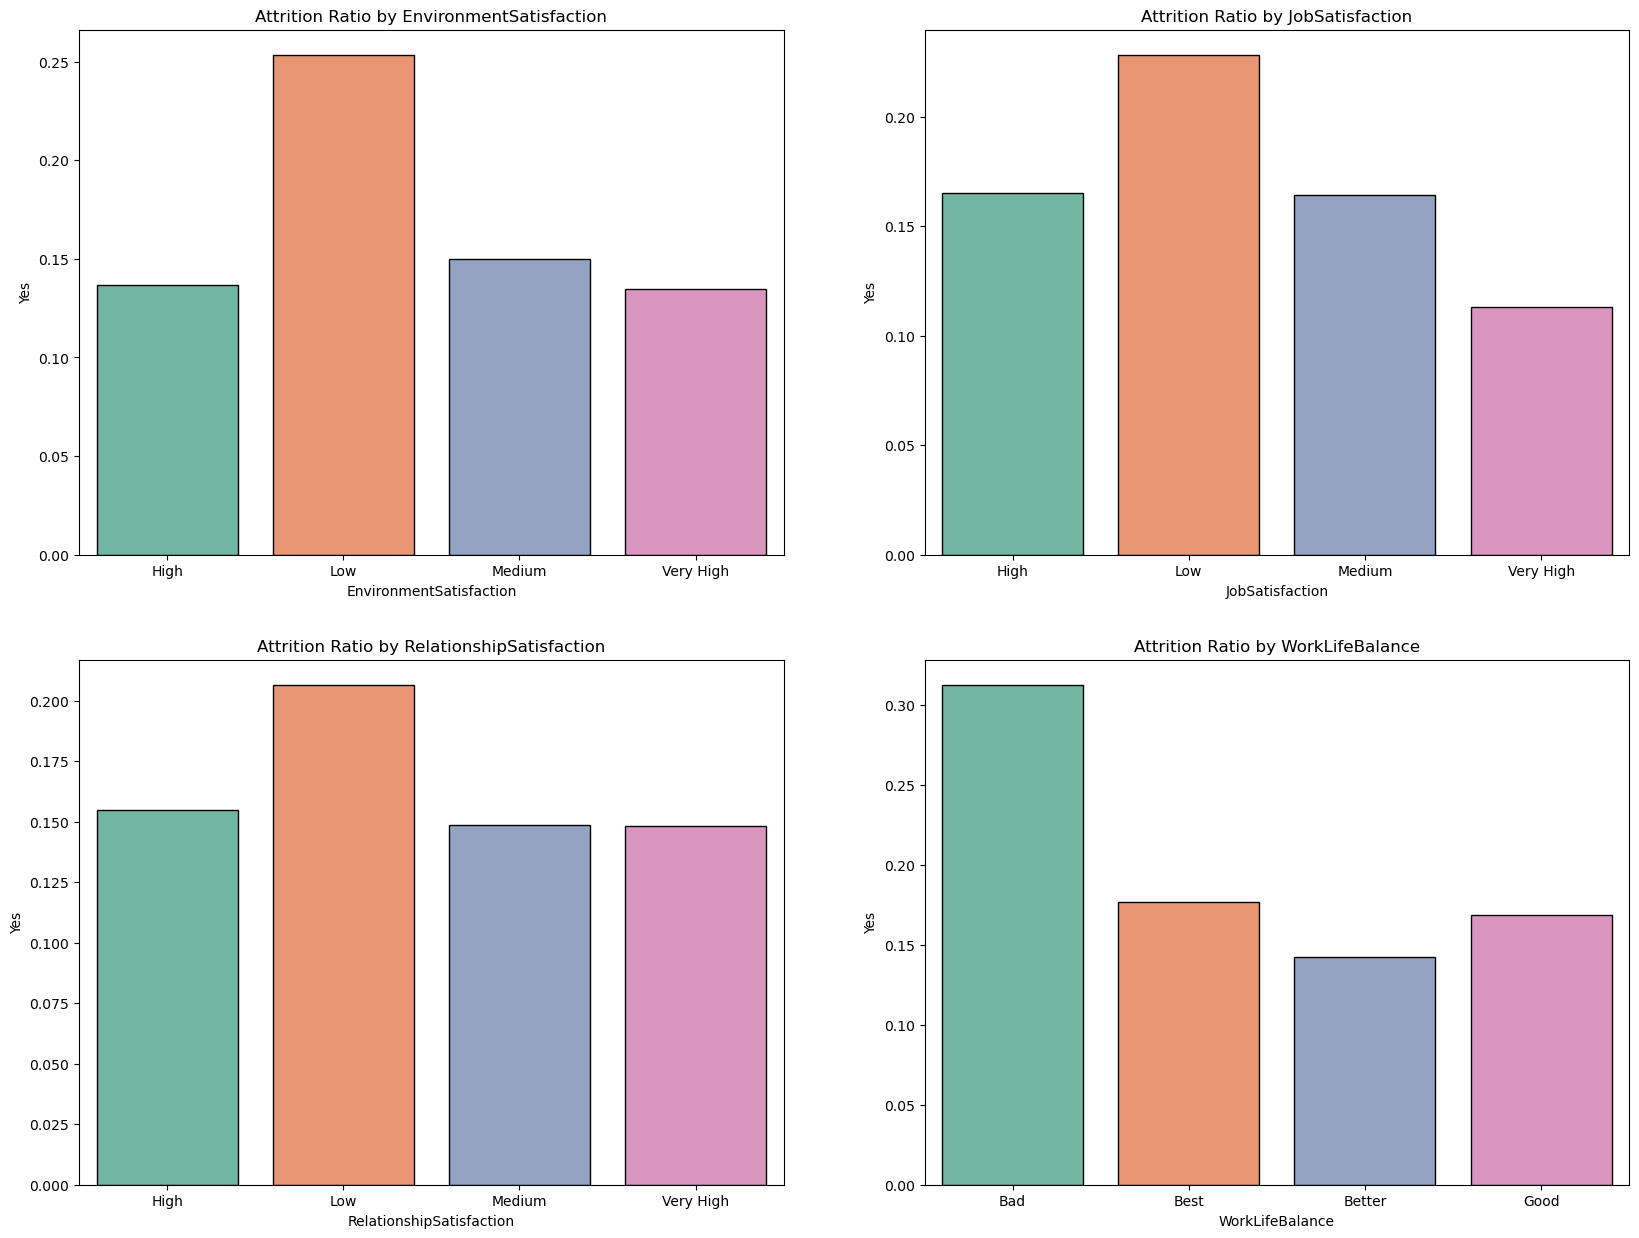

In [196]:
def ratio_df(col) :
    attrition = df[df['Attrition'] == "Yes"]
    ratios = df.groupby(col)['Attrition'].value_counts(normalize=True).unstack()
    ratios = pd.DataFrame(ratios['Yes'])
    
    return ratios

fig, ax = plt.subplots(2, 2, figsize=(20, 15))


sns.barplot(x='EnvironmentSatisfaction', y='Yes', data=ratio_df('EnvironmentSatisfaction'), palette='Set2', edgecolor='k', ax=ax[0, 0])
ax[0, 0].set_title('Attrition Ratio by EnvironmentSatisfaction')

sns.barplot(x='JobSatisfaction', y='Yes', data=ratio_df('JobSatisfaction'), palette='Set2', edgecolor='k', ax=ax[0, 1])
ax[0, 1].set_title('Attrition Ratio by JobSatisfaction')

sns.barplot(x='RelationshipSatisfaction', y='Yes', data=ratio_df('RelationshipSatisfaction'), palette='Set2', edgecolor='k', ax=ax[1, 0])
ax[1, 0].set_title('Attrition Ratio by RelationshipSatisfaction')

sns.barplot(x='WorkLifeBalance', y='Yes', data=ratio_df('WorkLifeBalance'), palette='Set2', edgecolor='k', ax=ax[1, 1])
ax[1, 1].set_title('Attrition Ratio by WorkLifeBalance')

➡️전체적으로 만족도가 **낮을수록** 퇴사 비율이 높은 것을 확인할 수 있음

### 4.2 업무 참여도에 따른 퇴사 비율

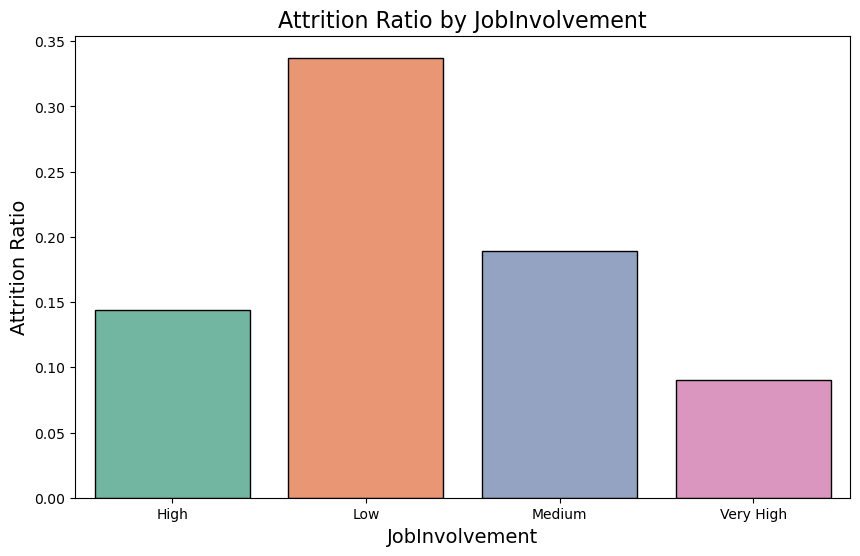

In [197]:
bar_plot('JobInvolvement')

➡️ 업무참여도가 **낮을수록** 퇴사율이 높아지는 것을 확인할 수 있음

### 4.3 급여 수준

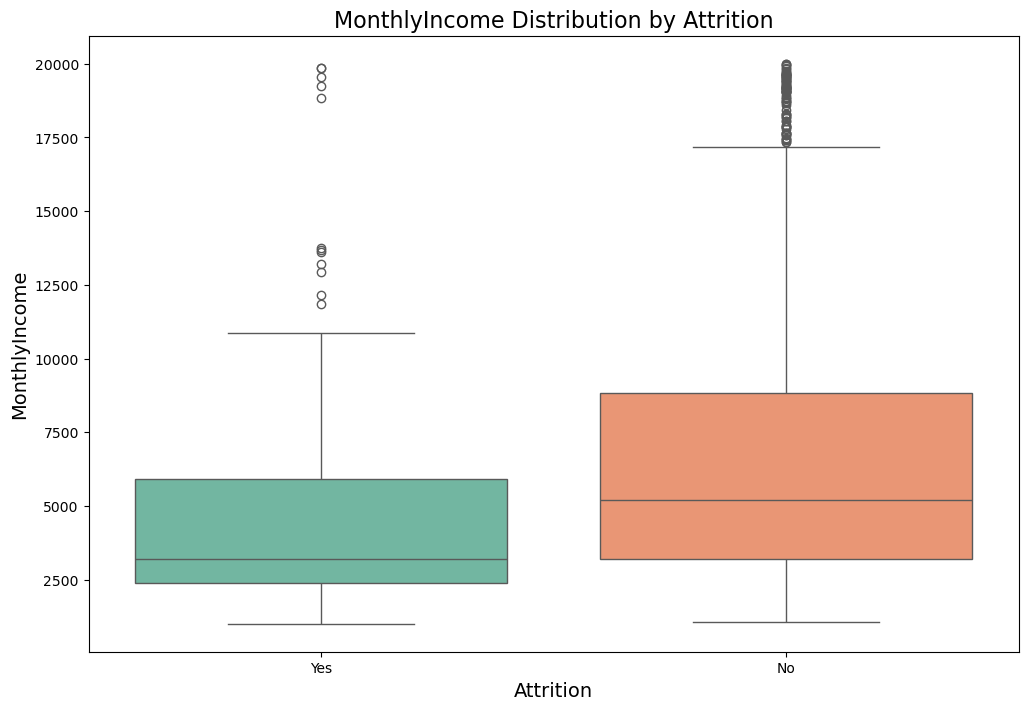

In [203]:
def numeric_vis(col):
    plt.figure(figsize=(12, 8))
    
    # Using boxplot to visualize salary distribution by attrition
    sns.boxplot(x='Attrition', y=col, data=df, palette='Set2')
    
    plt.title(f'{col} Distribution by Attrition', fontsize=16)
    plt.xlabel('Attrition', fontsize=14)
    plt.ylabel(f'{col}', fontsize=14)
    
    plt.show()

numeric_vis('MonthlyIncome')

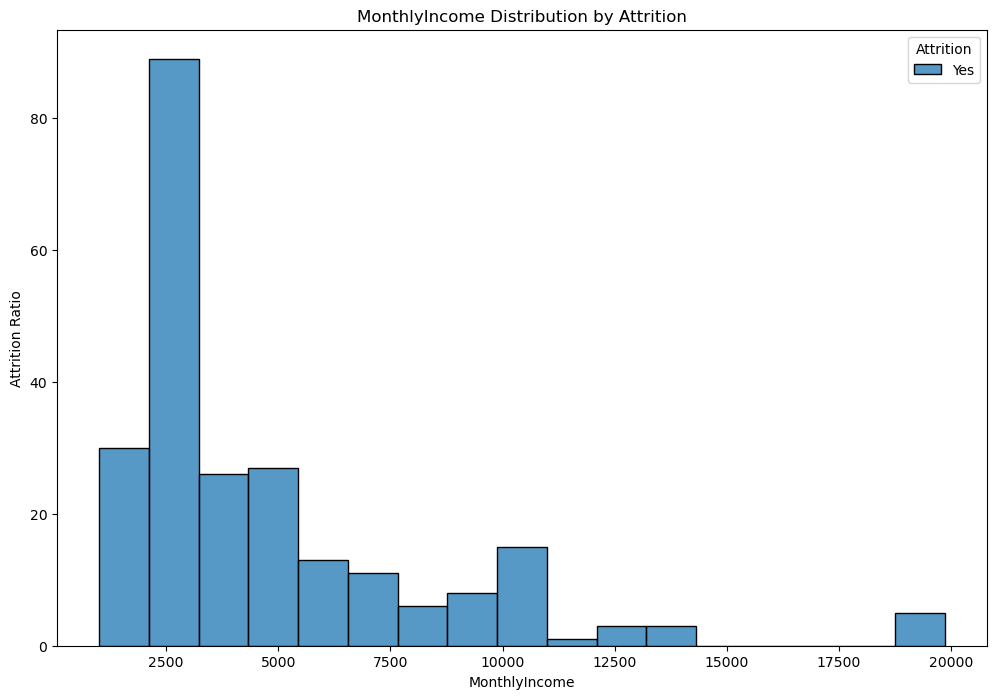

In [214]:
plt.figure(figsize=(12,8))
sns.histplot(df[(df['Attrition'] == "Yes")]['MonthlyIncome'], label='Yes')
plt.legend(title='Attrition')
plt.title("MonthlyIncome Distribution by Attrition")
plt.xlabel("MonthlyIncome")
plt.ylabel("Attrition Ratio")
plt.show()

➡️ 대체로 급여 수준이 낮을수록 퇴사율이 높아지는 것을 확인할 수 있음

### 4.4 초과근무 

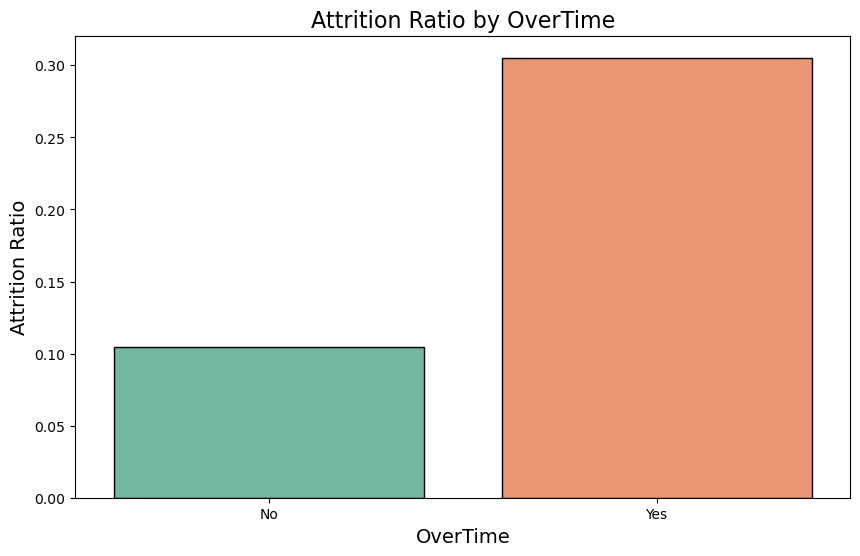

In [207]:
bar_plot("OverTime")

➡️ 초과근무를 한 사람들이 더 퇴사를 많이 한다는 사실을 확인할 수 있음

### 4.5 현재 역할에서의 근속연수,  승진에 따른 퇴사율

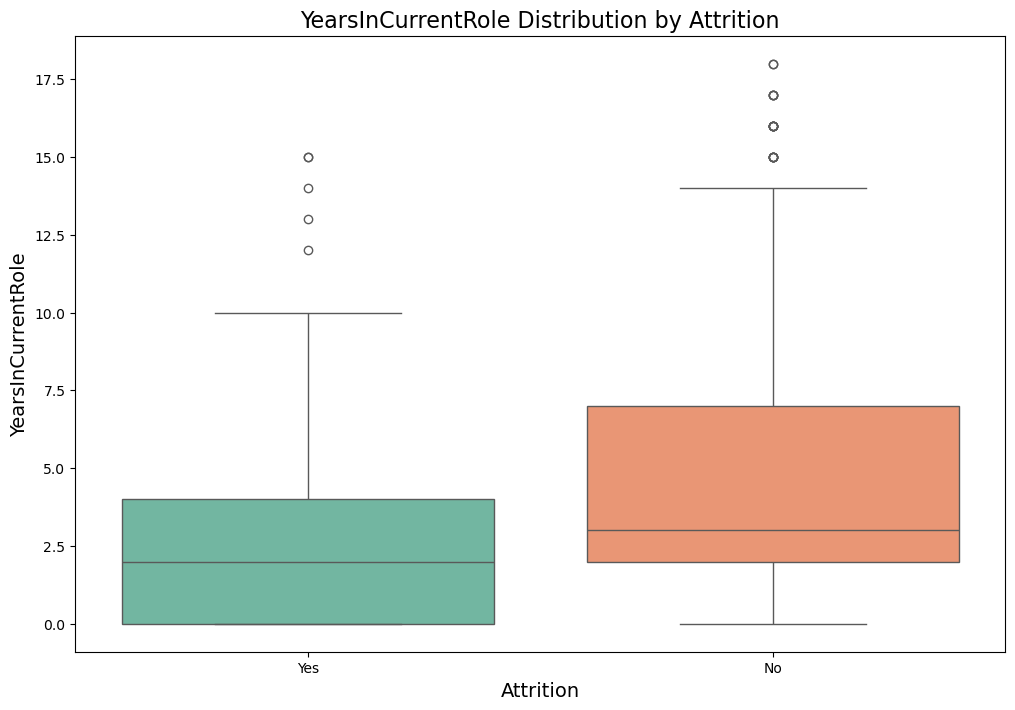

In [221]:
numeric_vis('YearsInCurrentRole')

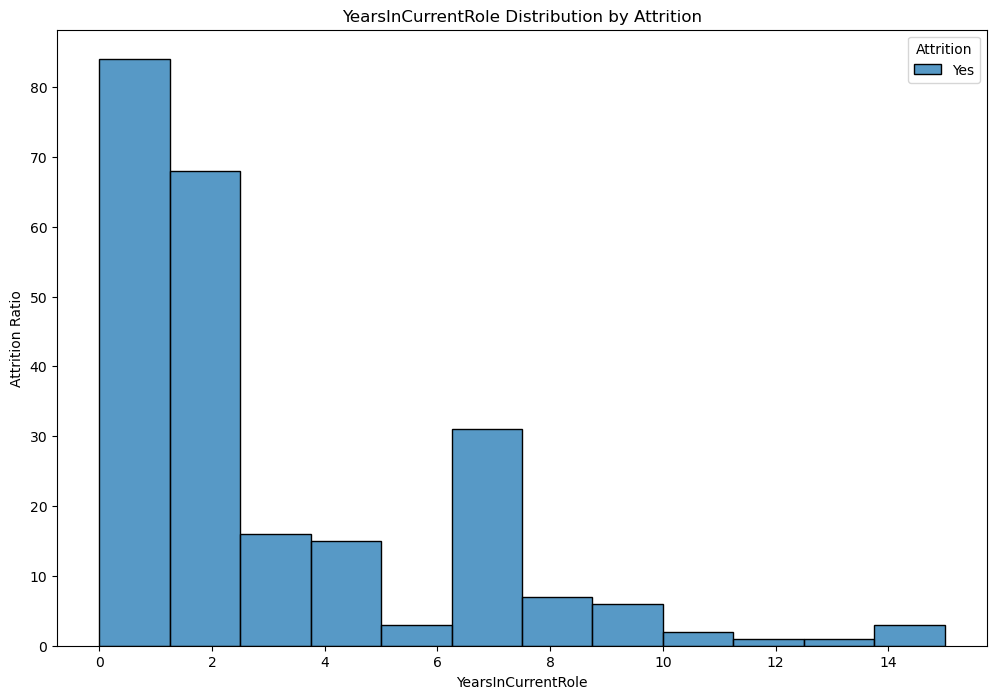

In [220]:
plt.figure(figsize=(12,8))
sns.histplot(df[(df['Attrition'] == "Yes")]['YearsInCurrentRole'], label='Yes')
plt.legend(title='Attrition')
plt.title("YearsInCurrentRole Distribution by Attrition")
plt.xlabel("YearsInCurrentRole")
plt.ylabel("Attrition Ratio")
plt.show()

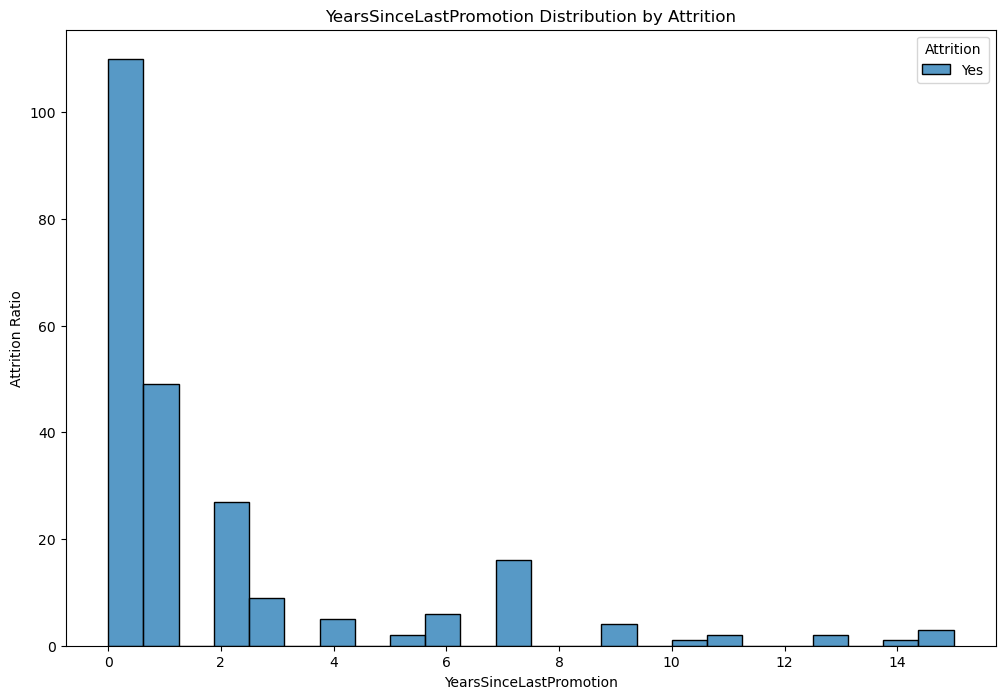

In [222]:
plt.figure(figsize=(12,8))
sns.histplot(df[(df['Attrition'] == "Yes")]['YearsSinceLastPromotion'], label='Yes')
plt.legend(title='Attrition')
plt.title("YearsSinceLastPromotion Distribution by Attrition")
plt.xlabel("YearsSinceLastPromotion")
plt.ylabel("Attrition Ratio")
plt.show()

➡️ 주로 현재 역할에서의 근속연수가 짧을수록, 퇴사율이 높은 것을 확인할 수 있음

➡️ 이와 비슷한 맥락으로, 세 번째 그래프에서 승진을 한지 얼마 되지 않았을 때 퇴사율이 높은 것도 확인할 수 있음

## 5. 수치형 변수 간 상관관계 

In [ ]:
df = df.replace({"Attrition": {'Yes' : 1, No : 0}})

<AxesSubplot:>

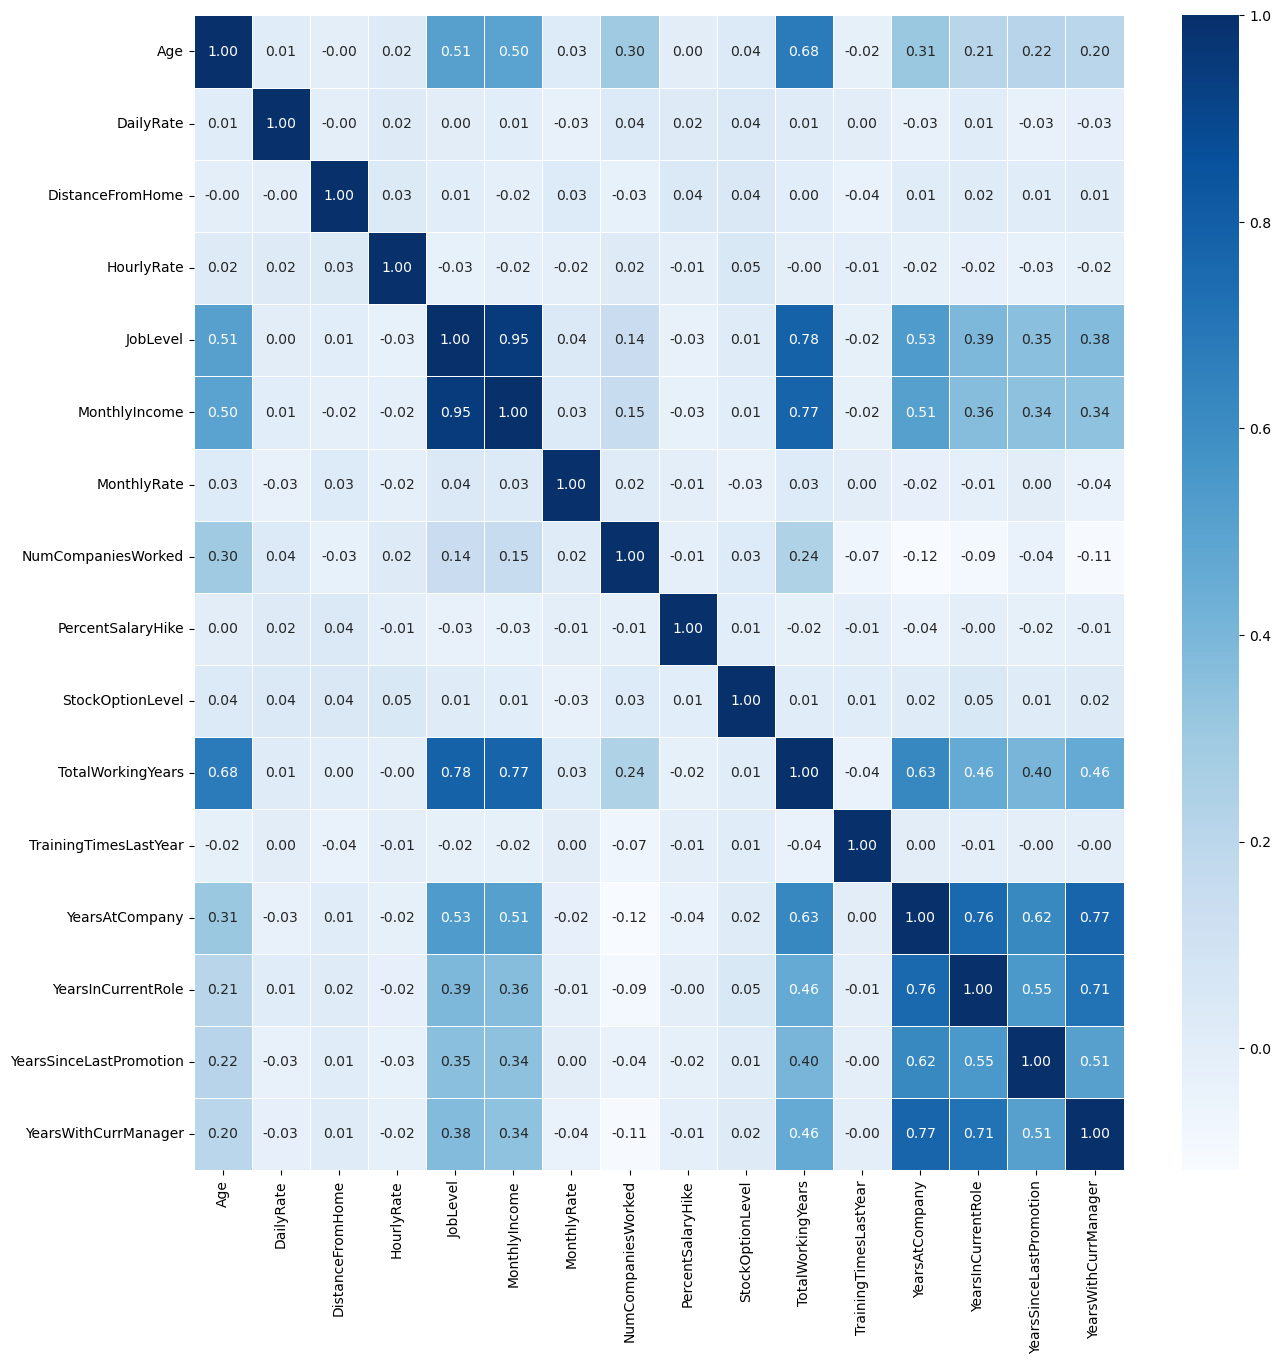

In [26]:
#상관관계 분석
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

➡️ JobLevel과 MonthlyIncome은 0.95로 매우 강한 상관관계를 가지며, 다중공선성 문제가 나타날 수 있으므로, 하나의 변수를 지우는 것이 필요해보임

|변수1|변수2|상관계수|설명|
|---|---|---|------|
|MonthlyIncome|TotalWorkingYears|0.77|강한 양의 상관관계를 가지며, 총 경력 기간이 많을수록 월급이 높은 경향이 있음|
|MonthlyIncome|YearsAtCompany|0.51|중간 정도의 양의 상관관계를 가지며, 총 근속연수가 길수록 월급이 높은 경향이 있음|
|YearsInCurrentRole|YearsAtCompany|0.76|강한 양의 상관관계를 가지며, 현재 회사에서의 근속연수가 길수록, 현재 역할에서의 근속연수가 긴 경향이 있음|
|YearsInCurrentRole|YearsWithCurrentManager|0.71|강한 양의 상관관계를 가지며, 현재 역할에서의 근무 기간이 길수록 현재 매니저와 함께 일한 기간 도 긴 경향이 있음|
|YearsInCurrentRole|YearsSinceLastPromotion|0.62|현재 역할에서의 근무 기간이 길수록 마지막 승진 이후 근무한 기간이 길다|

## 5. 파생 변수

### 5.1 스트레스 지수

위에서 만족도가 낮을수록 퇴사율이 높은 것을 확인하였으므로, 이 지표들을 종합하여 Stress 라는 새로운 변수를 생성함

In [157]:
df['Stress'] = 1 / (raw_df['WorkLifeBalance'] * raw_df['RelationshipSatisfaction'] * raw_df['JobSatisfaction']) * 10
df['Stress'].head()

0    2.500000
1    0.416667
2    0.555556
3    0.370370
4    0.416667
Name: Stress, dtype: float64

### 5.2 근속연수 대비 급여 수준

연차 대비 직급에 따라 급여의 수준이 달라질 수 있고, 급여가 퇴직 요인이 될 수 있음

In [158]:
df['IncomeLevel'] = df['MonthlyIncome'] / df['YearsAtCompany']
df.loc[df['YearsAtCompany'] == 0, 'IncomeLevel'] = df.loc[df['YearsAtCompany'] == 0, 'MonthlyIncome'] / 12
df['IncomeLevel'].head()

0     998.833333
1     513.000000
2     174.166667
3     363.625000
4    1734.000000
Name: IncomeLevel, dtype: float64

### 5.3 오랫동안 근속할 것인지 판단하는 지표

현재 근무하는 직원이 퇴사하지 않도록 유지하는 것도 중요하지만, 직원을 채용할 때 이를 판단할 수 있는 지표를 고려하는 것도 필요함

따라서, 이전 회사들에서 평균 근속 연수는 어떠한지 알아볼 수 있는 변수 생성

In [159]:
df['ContinuouslyWorking'] = df['NumCompaniesWorked'] / (df['TotalWorkingYears'] - df['YearsAtCompany'])

# df['NumCompaniesWorked']==1, 즉 IBM이 첫 직장인 경우 (inf -> 1로 변경)
df.loc[df['NumCompaniesWorked']==1, 'ContinuouslyWorking'] = 1
df['ContinuouslyWorking'].head()

0    4.000000
1    1.000000
2    0.857143
3    1.000000
4    2.250000
Name: ContinuouslyWorking, dtype: float64